In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
test_df = pd.read_csv('test.csv')

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


This data is from the "Bike sharing demand" compettition on Kaggle. [The bike sharing data](https://www.kaggle.com/competitions/bike-sharing-) demand/overview. I will be using the train set to train my model and a test set to test the efficiency of my machine learning algorithm prediction. Click on the link provided for more details.

In [6]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [7]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

NO missing values in our data set.

In [8]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train_df['season'].unique(), train_df['season'].nunique()

(array([1, 2, 3, 4], dtype=int64), 4)

In [10]:
train_df['holiday'].unique(),train_df['holiday'].nunique()

(array([0, 1], dtype=int64), 2)

In [11]:
train_df['weather'].unique(),train_df['weather'].nunique()

(array([1, 2, 3, 4], dtype=int64), 4)

In [12]:
 train_df['humidity'].nunique()

89

In [13]:
 train_df['humidity'].max(),  train_df['humidity'].min()

(100, 0)

In [14]:
train_df['workingday'].unique(),train_df['workingday'].nunique()

(array([0, 1], dtype=int64), 2)

In [15]:
train_df['count'].nunique()

822

# exploratory data analysis
To do this, we will first convert the datetime column into datetime format

Now lets work with the datetime column. The data time column is in the object format, we will convert it to datetime format using the pandas datetime module. --->

In [16]:
train_df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype 
--------------  ----- 
10886 non-null  object
dtypes: object(1)
memory usage: 85.2+ KB


In [17]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [18]:
train_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
train_df['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
10886 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 85.2 KB


In [20]:
train_df['hour'] = train_df['datetime'].apply(lambda date: date.hour)
train_df['weekday'] = train_df['datetime'].apply(lambda date: date.weekday())
train_df['month'] = train_df['datetime'].apply(lambda date: date.month)
train_df['year'] = train_df['datetime'].apply(lambda date: date.year)

In [21]:
train_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,2011


In [22]:
train_df['year'].unique()

array([2011, 2012], dtype=int64)

In [23]:
train_df['weekday'].nunique(), train_df['weekday'].unique()

(7, array([5, 6, 0, 1, 2, 3, 4], dtype=int64))

Lets begin exploring our data through visualizations

<Axes: xlabel='hour', ylabel='count'>

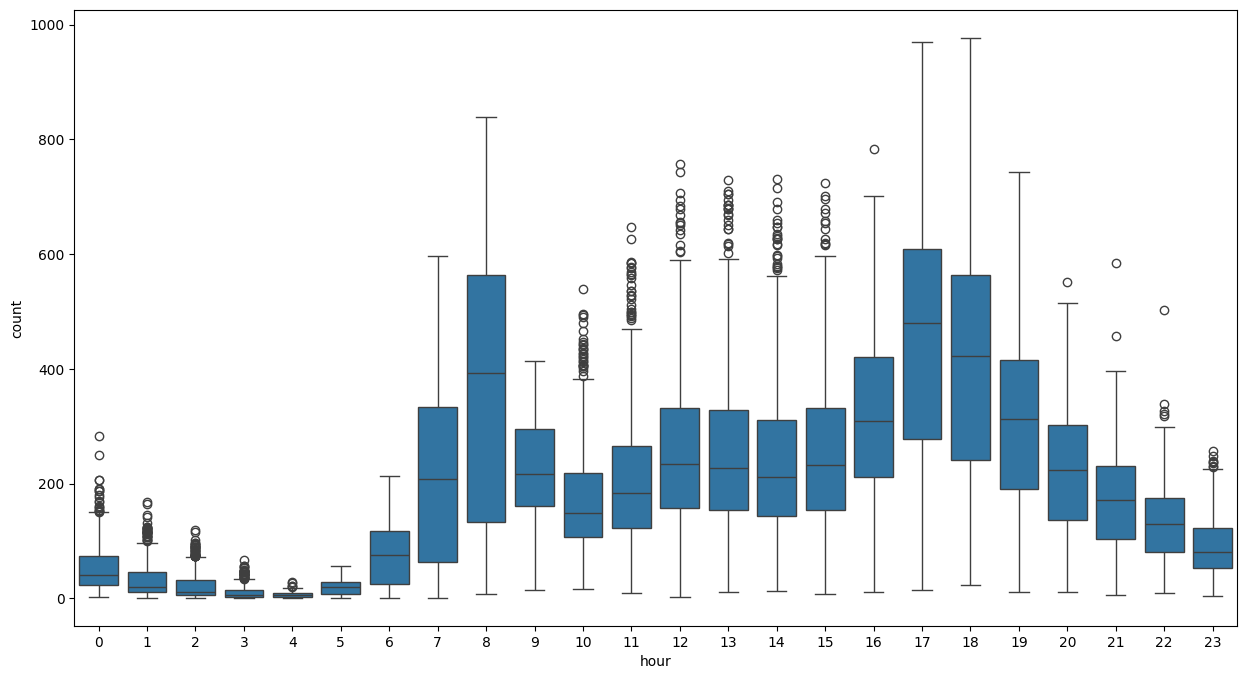

In [24]:
plt.figure(figsize=(15,8))
sns.boxplot(data=train_df, x='hour', y='count')

From the above, It is can be seen that the numbers starts peaking at around 7am and peaked at 8am, which is usually the morning rushing hour. It stabilizes and later starts peaking at 4pm and peaked the highest at 5pm, which is usually the evening peak hour. lets explore it by weekday --->

<Axes: xlabel='weekday', ylabel='count'>

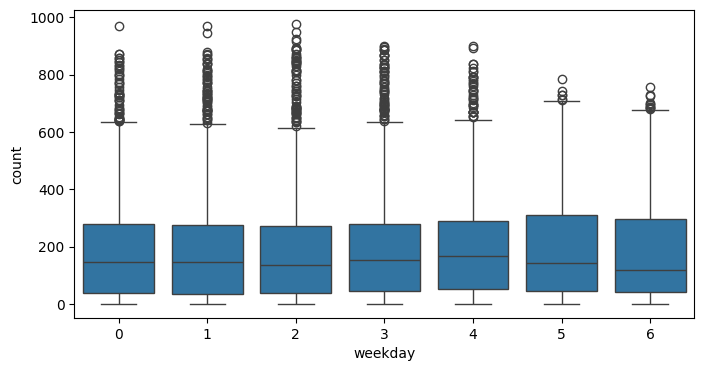

In [25]:
plt.figure(figsize=(8,4))
sns.boxplot(data=train_df, x='weekday', y='count')

The difference here is not as obvious as hourly mean. This makes sense since even during weekends, people still use bikes for recreation and other personal usage. sunday is the lowest, showing a drop in mean of total counts.. 

<Axes: xlabel='weekday'>

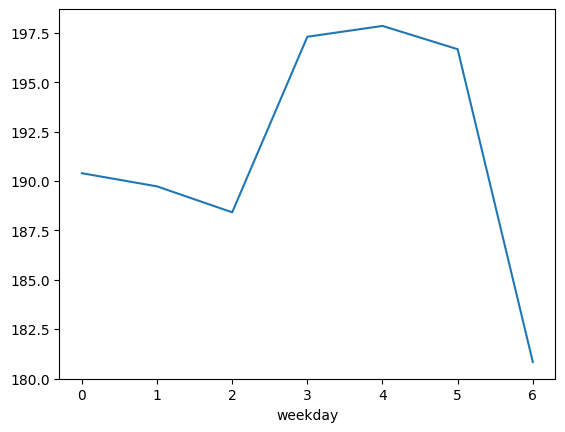

In [26]:
train_df.groupby('weekday').mean()['count'].plot()

This plot more clearly shows the pattern of the usage. it drops sharply on saturday and increases signigicantly on monday.lets view it monthly-->

<Axes: xlabel='month', ylabel='count'>

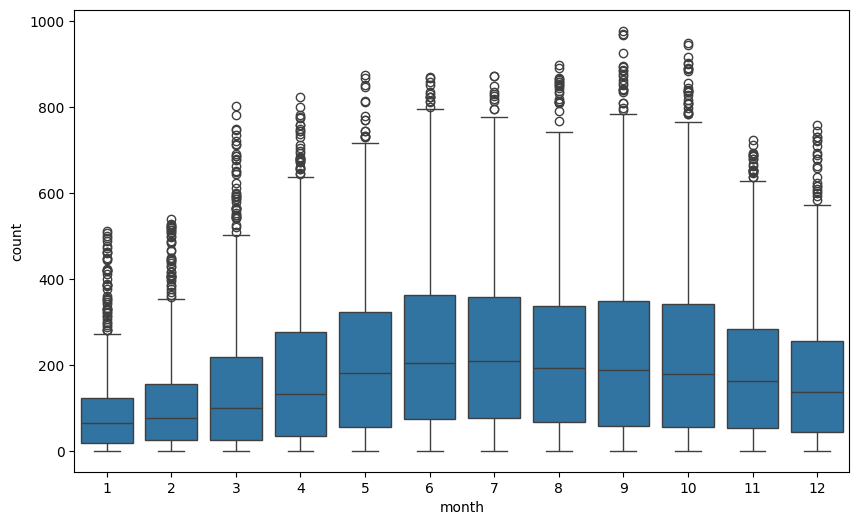

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=train_df, x='month', y='count')

The mean of total users lowest in the early year and late, and also peaks during the mid year around june, july and august. We should remember that december through January is winter and holidays season in washington DC: where the data originate. while the peak here is during and around Summertime. Lets view it through the years---->

<Axes: xlabel='year', ylabel='count'>

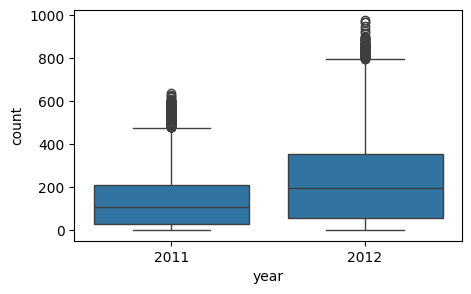

In [28]:
plt.figure(figsize=(5,3))
sns.boxplot(data=train_df, x='year', y='count')

In [29]:
train_df['year'].value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

There is an obvious increase in the number of total users form 2011 to 2012. This may be due to couple reasons such as Increase in the number of Bicycles, accessibility, Awareness, Incentives such as cheapness of ride and so on. Since the total number of years is significantly balanced (in the'year' column),the gap in the mean is due to the increase in the number of 'count', I.e more people have rented a bicycle in 2012 than the previous year. Lets see it froom the plot below --->

<Axes: xlabel='year', ylabel='count'>

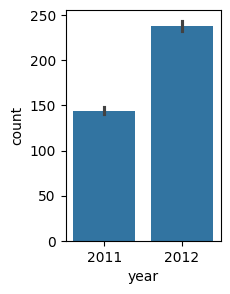

In [30]:
plt.figure(figsize=(2,3))
sns.barplot(data=train_df,x='year',y='count')

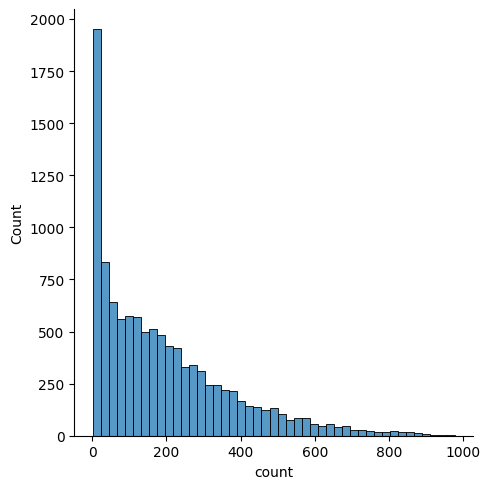

In [31]:
sns.displot(data=train_df,x='count')

NOW, LET US EXPLORE THE CORRELATION OF THE DATA FEATURES

In [32]:
corr = train_df.corr(numeric_only=True)

In [33]:
corr['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
workingday    0.011594
weekday      -0.002283
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

We can see the correlation of all the features with the total count. It makes sense that the registered and casual have highest correlation with the total count as their sum is equal to the count itself. The temperatue and feel comes next which we are yet to explore. Humidity has the highest negative correlation to count. Before we keep exploring, let's view the correlation in a chart:

<Axes: >

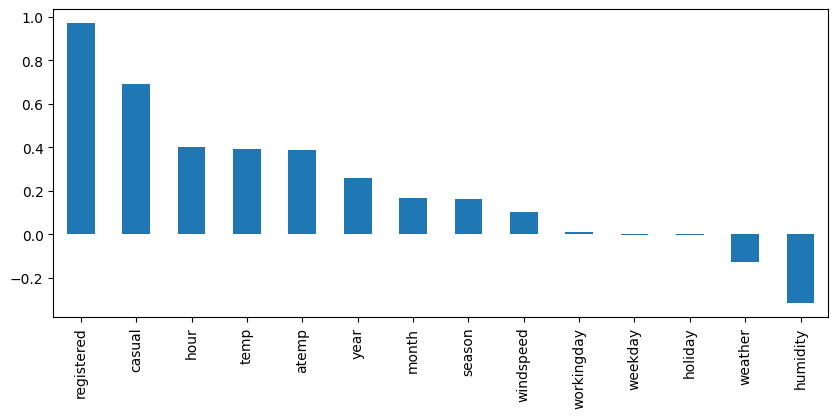

In [34]:
plt.figure(figsize=(10,4))
corr['count'].sort_values(ascending=False)[1:].plot(kind='bar')

Weekday, holiday and working day have the lowest correlation to our target, count. I will decide on whether to drop any as we go forward with more exploration and insights. Lets view the heat map before proceeding

<Axes: >

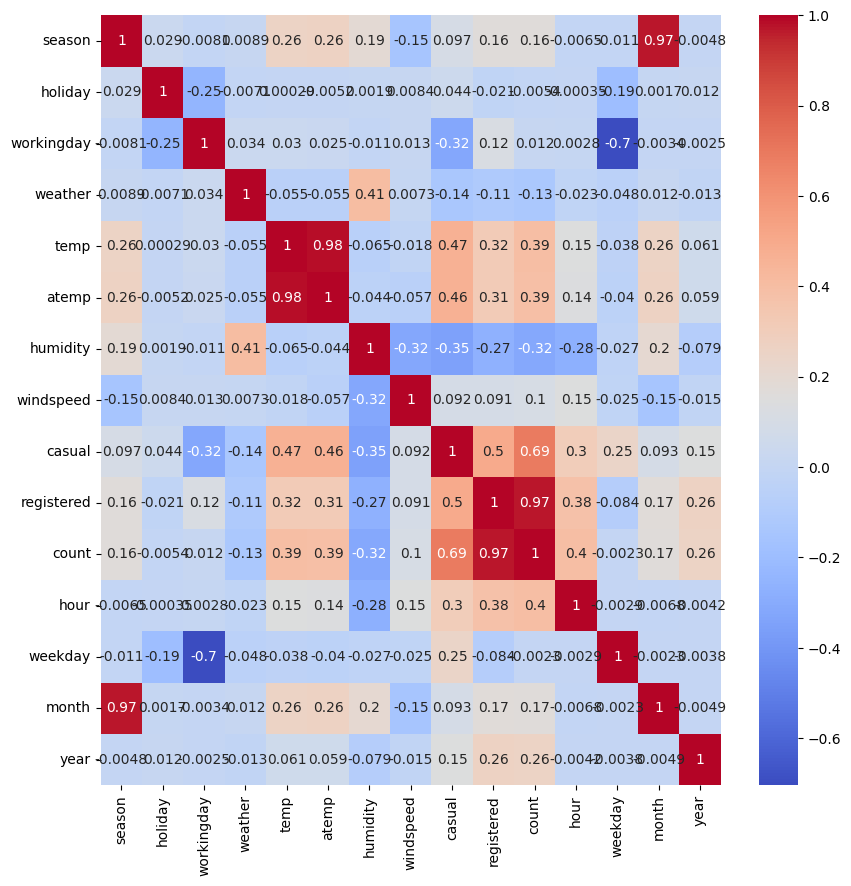

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Ofcourse Weekday and workingday have a high negative correlation. Lets check their plot to see the trends and how the negative correlation comes to be. Remember that the working days are 1 and non-working days are 0. weekdays starts from monday as 0 to sunday as 6. the trends plot ---->

In [36]:
# number of non working days that concides with sundays
len(train_df[(train_df['workingday'] == 0) & (train_df['weekday'] == 6)])

1579

In [37]:
# number of non working days that concides with saturday
len(train_df[(train_df['workingday'] == 0) & (train_df['weekday'] == 5)])

1584

<Axes: xlabel='weekday', ylabel='workingday'>

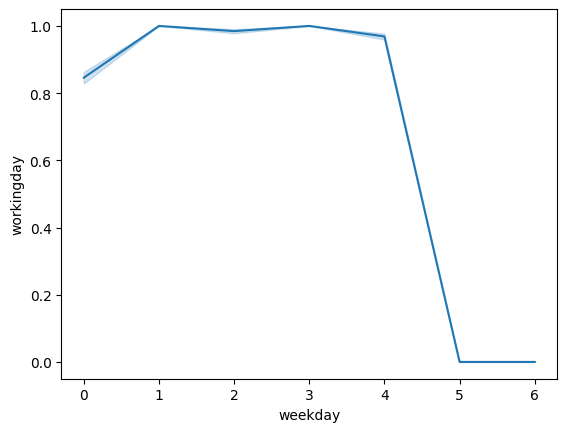

In [38]:
sns.lineplot(x='weekday',y='workingday',data=train_df,)

The plot above aggregate the data by taking the mean of the working day per weekday. But since generally weekends are non working days, lets create a lineplot for that. By the way, The plot above clearly shows why the high correlation is negative.

In [39]:
train_df.groupby('weekday')['workingday'].agg(lambda x: x.mode()[0]).reset_index()

,weekday,workingday
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
5,5,0
6,6,0


<Axes: xlabel='weekday', ylabel='workingday'>

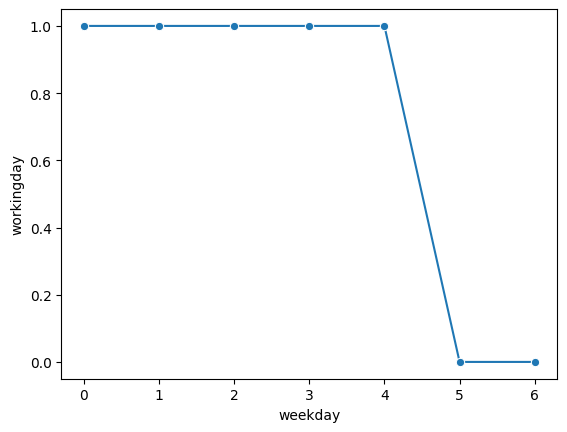

In [40]:
binary_df = train_df.groupby('weekday')['workingday'].agg(lambda x: x.mode()[0]).reset_index()

sns.lineplot(x='weekday', y='workingday', data=binary_df, errorbar=None,marker='o')

Above is plot showing weekends are as non workig days and weekdays as working days.Now since weekdays and weekends have a high correlation, with weekdays having the least correlation with "count" amongst all the other features, we will drop the weekdays from our data set and work with only the workingday instead.

In [41]:
train_df = train_df.drop('weekday', axis=1)

In [42]:
train_df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011


The next highly correlated features to 'count' (besides registered and casual) are Temperature('temp') and the temperature feel('atemp').let's see them using lineplot --->

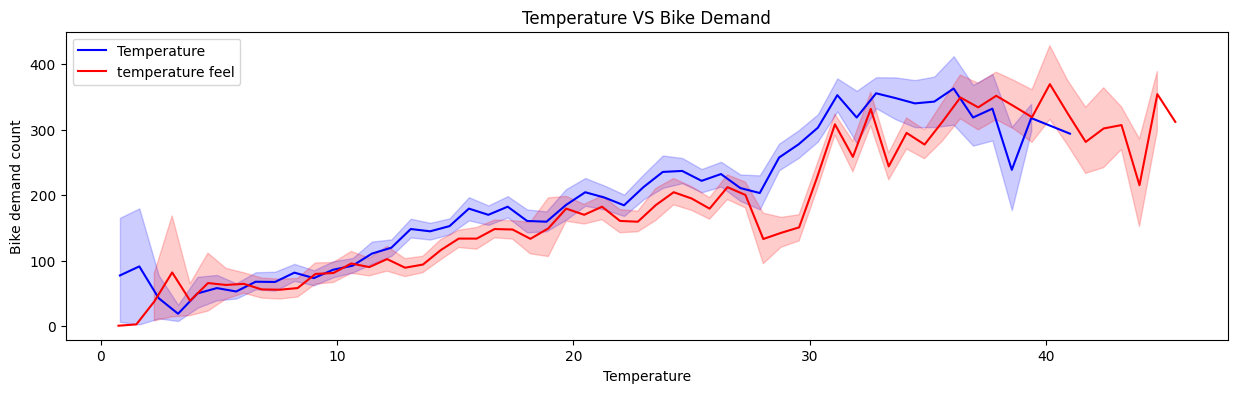

In [43]:
plt.figure(figsize=(15,4))
sns.lineplot(data=train_df, x='temp', y='count', legend='full',color='b', label = 'Temperature')
sns.lineplot(data=train_df, x='atemp', y='count', legend='full',color='red', label = 'temperature feel')

plt.title('Temperature VS Bike Demand')
plt.xlabel('Temperature')
plt.ylabel('Bike demand count')
plt.legend()

The trend shows that demand generally rises from about 3 degress celcius till about 32 before falling. which shows most bicycle users tend not to use them often in extreme temperate. lets see the number of users by weather and seasons:
Remember that: 

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter , and

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

 So in both features, 2 and 3 are kind of best to moderate condition for going out biking. Lets see the numbers to confirm:

In [44]:
train_df.groupby('season').mean()[['temp','atemp','count']]

,temp,atemp,count
season,,,
1,12.530491,15.228956,116.343261
2,22.823483,26.647098,215.251372
3,28.789111,32.540783,234.417124
4,16.649239,20.059909,198.988296


In [45]:
train_df.groupby('weather').mean()[['temp','atemp','count']]

,temp,atemp,count
weather,,,
1,20.557122,23.994126,205.236791
2,19.614608,23.072414,178.955540
3,19.546356,22.753091,118.846333
4,8.200000,11.365000,164.000000


Just as we have expected, '2' and '3' have higher count except for the '4' in weather, which has a higher number of count than '3'. lets check again including the registered and casual column.

In [46]:
train_df.groupby('weather').mean()[['temp','atemp','casual','registered','count']]

,temp,atemp,casual,registered,count
weather,,,,,
1,20.557122,23.994126,40.308676,164.928115,205.236791
2,19.614608,23.072414,30.785462,148.170078,178.955540
3,19.546356,22.753091,17.442375,101.403958,118.846333
4,8.200000,11.365000,6.000000,158.000000,164.000000


In [47]:
train_df[train_df['weather'] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,18,1,2012


In [48]:
train_df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

And there it is. It has only one entry, so the aggregate return the same value. Lets view the counts for each weather category in every season. ---->

<Axes: xlabel='season', ylabel='count'>

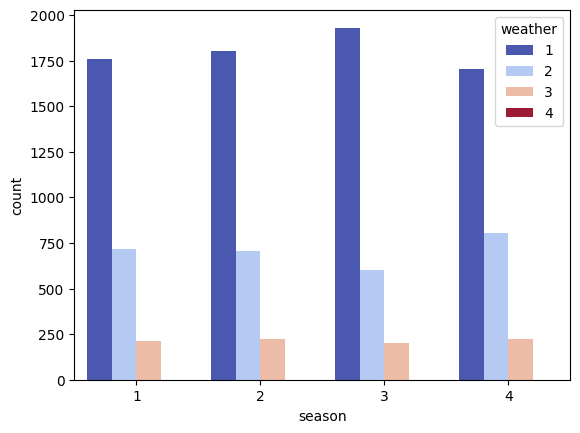

In [49]:
sns.countplot(data=train_df, x='season', hue='weather', palette='coolwarm')

Now let's view the relationship between season, weather and the count column 

<Axes: xlabel='season', ylabel='count'>

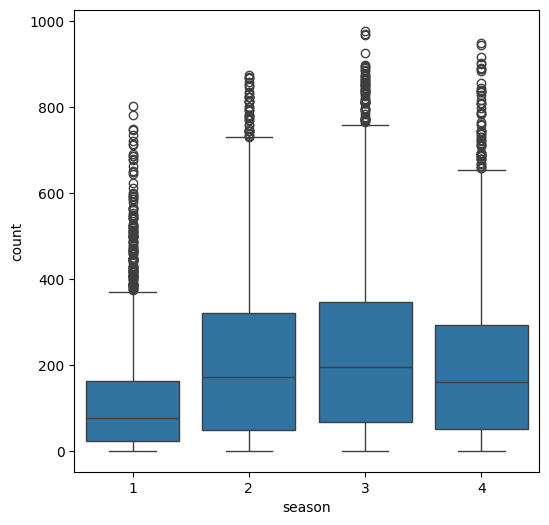

In [50]:
# season
plt.figure(figsize=(6,6))
sns.boxplot(data=train_df, x='season', y='count')

In [51]:
train_df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

season-1 is spring in washington DC where rainfall is regular so bike usage is significantly less. fall has the highest due to it being favorable for outdoor activities followed by summer.

<Axes: xlabel='weather', ylabel='count'>

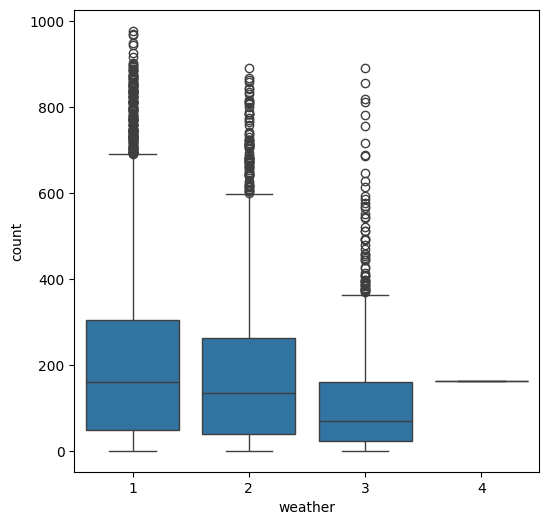

In [52]:
plt.figure(figsize=(6,6))
sns.boxplot(data=train_df, x='weather', y='count')

weather '1' has the highest count due to it being clear and dry, thus favorable for riding. weather '3' is the lowest among the first three due to it being the harshest amongst them. weather 4 only has one entry, although with alot of registrations, probably in anticipation of weather 1, or a surprisingly clear day.

Now lets work on holiday, windspeed and then humidity, which has the highest negative correlation to 'count'. 

In [53]:
train_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011


From the correlation plot, holidays also has a low correlation to count, that is it has low effect in determining rentals of bicycles.Let's explore more --->

In [54]:
train_df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

most of the entries are of course not on holidays

<Axes: xlabel='holiday', ylabel='count'>

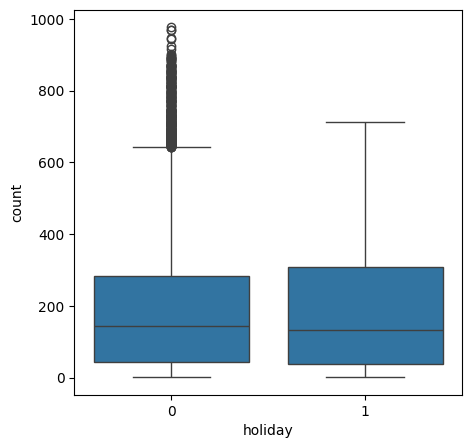

In [55]:
plt.figure(figsize=(5,5))
sns.boxplot(data=train_df,x='holiday', y='count')

In [56]:
train_df.groupby('holiday').mean()['count']

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

It can be seen that there is no much difference on the count of rentals on Holidays or otherwise. Let's move on to windspeedr --->

In [57]:
train_df['windspeed'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10886 entries, 0 to 10885
Series name: windspeed
Non-Null Count  Dtype  
--------------  -----  
10886 non-null  float64
dtypes: float64(1)
memory usage: 85.2 KB


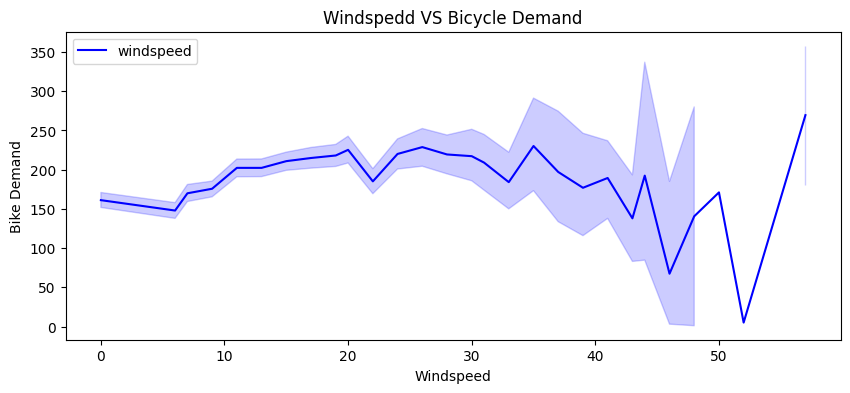

In [58]:
plt.figure(figsize=(10,4))
sns.lineplot(data=train_df, x='windspeed', y='count', legend='full',color='b', label = 'windspeed')

plt.xlabel('Windspeed'); plt.ylabel('Bike Demand')
plt.title('Windspedd VS Bicycle Demand')
plt.legend()

The demand generally starts to fall at around 35km/h windspeed. There seem to be a surge at around 45 and another after 50km/h. lets check to see the numbers:

In [59]:
len(train_df[train_df['windspeed'] > 45])

9

we have only 9 entries out of more than 10,000 entries when the windspeed is above 45km/h. It is not the usual and also is the cause of the strange behavior of the plot after 45km/h. Since is not safe/usual to ride bikes at a windspeed of 45km/h, and we have only 9 entires anyway, we will drop the 9 entries for better generalization.

In [60]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  year        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 1.2 MB


In [61]:
train_df = train_df[train_df['windspeed'] <= 45]

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10877 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10877 non-null  datetime64[ns]
 1   season      10877 non-null  int64         
 2   holiday     10877 non-null  int64         
 3   workingday  10877 non-null  int64         
 4   weather     10877 non-null  int64         
 5   temp        10877 non-null  float64       
 6   atemp       10877 non-null  float64       
 7   humidity    10877 non-null  int64         
 8   windspeed   10877 non-null  float64       
 9   casual      10877 non-null  int64         
 10  registered  10877 non-null  int64         
 11  count       10877 non-null  int64         
 12  hour        10877 non-null  int64         
 13  month       10877 non-null  int64         
 14  year        10877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 1.3 MB


Now lets look into 'Humidity', which has the largest negative correlation among the features:

In [63]:
train_df['humidity'].info()

<class 'pandas.core.series.Series'>
Index: 10877 entries, 0 to 10885
Series name: humidity
Non-Null Count  Dtype
--------------  -----
10877 non-null  int64
dtypes: int64(1)
memory usage: 170.0 KB


In [64]:
train_df['humidity'].nunique()

89

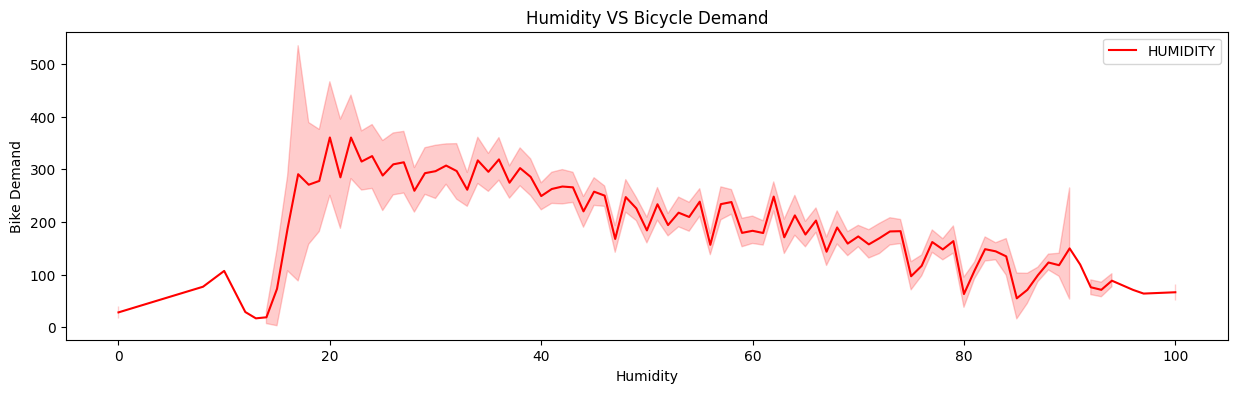

In [65]:
plt.figure(figsize=(15,4))
sns.lineplot(data=train_df, x='humidity', y='count', legend='full',color='r', label = 'HUMIDITY')

plt.xlabel('Humidity'); plt.ylabel('Bike Demand')
plt.title('Humidity VS Bicycle Demand')
plt.legend()

There is a sudden spike in demand at around 17 or thereabout, then it remain more steady from 20 to around 60 and then generally keeps declining gradually. the sudden spike in the begining also shows a lot of variance (shaded area). lets check the number of entries below 20:

In [66]:
len(train_df[train_df['humidity'] < 20])

67

In [67]:
len(test_df[test_df['humidity'] < 20])

10

Seeing that we have less than 1% of the data with humidity less than 20 in the training set and even less than that for the test set. I will be drop the entries with humidity less than 20 from the training data. 

In [68]:
train_df = train_df[train_df['humidity'] >= 20]

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10810 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10810 non-null  datetime64[ns]
 1   season      10810 non-null  int64         
 2   holiday     10810 non-null  int64         
 3   workingday  10810 non-null  int64         
 4   weather     10810 non-null  int64         
 5   temp        10810 non-null  float64       
 6   atemp       10810 non-null  float64       
 7   humidity    10810 non-null  int64         
 8   windspeed   10810 non-null  float64       
 9   casual      10810 non-null  int64         
 10  registered  10810 non-null  int64         
 11  count       10810 non-null  int64         
 12  hour        10810 non-null  int64         
 13  month       10810 non-null  int64         
 14  year        10810 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 1.3 MB


In [70]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,2011


# categorical column 
To work with the categorical columns, we will convert them to dummy variables.Lets first drop the datetime, casual and registered column.

In [71]:
train_df = train_df.drop(['datetime','casual','registered'], axis=1)

In [72]:
train_df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,2011


In [73]:
print(train_df[['season','weather','hour','month','year']].nunique())

season      4
weather     4
hour       24
month      12
year        2
dtype: int64


In [74]:
colums_to_dumies = ['season','weather','hour','month','year']

In [75]:
train_df[colums_to_dumies] = train_df[colums_to_dumies].astype('category')

In [76]:
dummies = pd.get_dummies(data=train_df,columns=colums_to_dumies, drop_first=True)

In [77]:
dummies.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_2,season_3,season_4,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2012
0,0,0,9.84,14.395,81,0.0,16,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0,9.02,13.635,80,0.0,40,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,0,9.02,13.635,80,0.0,32,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0,9.84,14.395,75,0.0,13,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,0,9.84,14.395,75,0.0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
dummies = dummies.drop(['holiday','workingday','temp','atemp','humidity','windspeed','count'], axis=1)

In [79]:
dummies.columns

Index(['season_2', 'season_3', 'season_4', 'weather_2', 'weather_3',
       'weather_4', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'year_2012'],
      dtype='object')

In [80]:
dummies = dummies.astype(int)

In [81]:
dummies.head()

,season_2,season_3,season_4,weather_2,weather_3,weather_4,hour_1,hour_2,hour_3,hour_4,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2012
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [82]:
train_df = pd.concat([train_df, dummies],axis=1)

In [83]:
train_df.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2012
0,1,0,0,1,9.84,14.395,81,0.0,16,0,...,0,0,0,0,0,0,0,0,0,0


# Preparing our test data

In [84]:
test_df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027


In [85]:
test_df['datetime'] = pd.to_datetime(test_df['datetime'])

In [86]:
test_df['hour'] = test_df['datetime'].apply(lambda date: date.hour)
test_df['month'] = test_df['datetime'].apply(lambda date: date.month)
test_df['year'] = test_df['datetime'].apply(lambda date: date.year)

In [87]:
test_df.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,year
0,2011-01-20,1,0,1,1,10.66,11.365,56,26.0027,0,1,2011


In [88]:
test_df = test_df.drop('datetime',axis=1)

In [89]:
dummies = pd.get_dummies(data=test_df,columns=colums_to_dumies, drop_first=True)

In [90]:
dummies = dummies.drop(['holiday','workingday','temp','atemp','humidity','windspeed'], axis=1)

In [91]:
dummies.columns

Index(['season_2', 'season_3', 'season_4', 'weather_2', 'weather_3',
       'weather_4', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'year_2012'],
      dtype='object')

In [92]:
dummies = dummies.astype(int)

In [93]:
test_df = pd.concat([test_df,dummies], axis=1)

In [94]:
test_df.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2012
0,1,0,1,1,10.66,11.365,56,26.0027,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,1,1,...,0,0,0,0,0,0,0,0,0,0


# NOW WE PREPARE OUR TRAINING SET FOR MODELLING. 

In [95]:
from  sklearn.model_selection import train_test_split

We will be training several models so we will get a copy of X and y for each model

In [96]:
train_data = train_df.copy()

In [97]:
X = train_data.drop('count',axis=1)
y = train_data['count']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

SCALING

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()

In [101]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# model training
LINEAR REGRESSION

In [102]:
# Lets first train a linear regression model 
from sklearn.linear_model import LinearRegression

In [103]:
lin_reg = LinearRegression()

In [104]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [105]:
# predictions
lin_reg_pred = lin_reg.predict(X_test)

Lets plot the y_test againt the predictions to view the accuracy of the model:

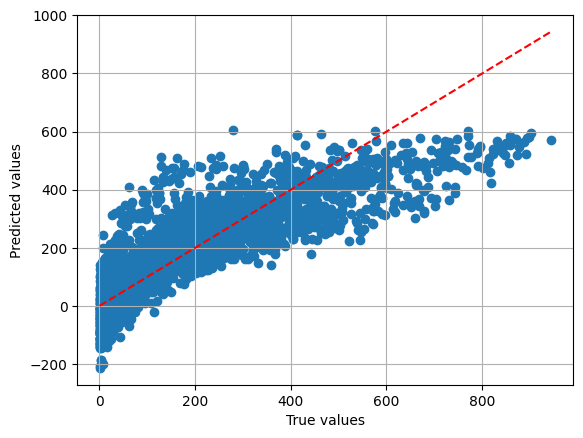

In [106]:
plt.scatter(y_test, lin_reg_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # plots a 45 degress, that is a perfect model line.
plt.xlabel('True values'); plt.ylabel('Predicted values')
plt.grid(True)

Ideally, the model should line with the red line (at 45°). That is the closer the points are to that line, the better the predictions. Fom the plot above, we you can see that the  model is underpredicting especially as the true values increases, falling more and more below the red line. There is also a clear curve pattern suggesting the model not capturing the non-linearity in the data. In escense, this model is not performing great. 

However, according the Kaggle competition requirements, we are to use the Root Mean Squared Logarithmic Error, RMSLE, for evaluation. from the graph above, we can see that some of the predictions are negative. RMSLE cannot work on negative values. We can just used other models such as tree-based models or neural networks for this, or Log-transform out target variables. Lets first try the former before proceeding with other models.

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [108]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

In [109]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [110]:
lin_reg.fit(X_train, y_train_log)

LinearRegression()

In [111]:
lin_reg_pred_log = lin_reg.predict(X_test)
lin_reg_pred = np.exp(lin_reg_pred_log) - 1

Just as the first model, lets plot the true values against the predicted values:

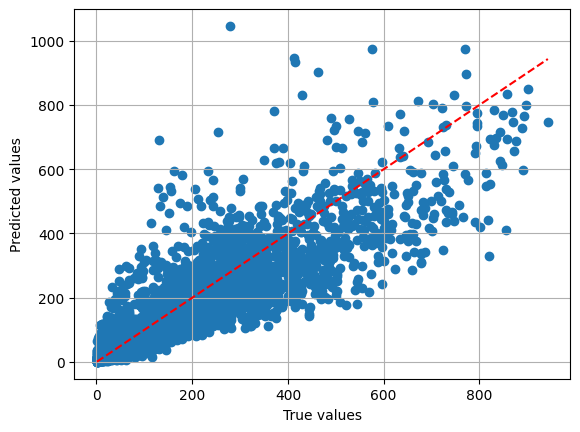

In [112]:
plt.scatter(y_test, lin_reg_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # plots a 45 degress, that is a perfect model line.
plt.xlabel('True values'); plt.ylabel('Predicted values')
plt.grid(True)

Compare to the first plot, there is clearly an improvement. the trend is more in line with the red diagonal improving accuracy of higher true values. One important thing to notice here is that with increase in the true values, there is more spread in the predicted values, which means the model is not capturing enough the pattern at high values. 

Lets now use the RMSLE to evaluate our model. 

In [113]:
from sklearn.metrics import mean_squared_log_error

In [114]:
msle = mean_squared_log_error(y_test, lin_reg_pred)

In [115]:
rmsle = np.sqrt(msle)
rmsle

0.5910022044668785

Our model is not really great in prediction. an error of 0.591 is high. lets check it in terms of a more relatable value. 

In [116]:
np.exp(0.591)

1.8057933061082023

This means that our model's prediction is typically off by a factor of 1.80. That is around 80% higher or lower than the actuals on average. Now lets try another model --->

SUPPORT VECTOR REGRESSION

In [117]:
# A new training and testing set from X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [118]:
from sklearn.svm import SVR

In [119]:
# scaling 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
svr = SVR()

In [121]:
svr.fit(X_train, y_train)

SVR()

In [122]:
svr_pred = svr.predict(X_test)

Now lets plot our true values VS our predicted values as done earlier:

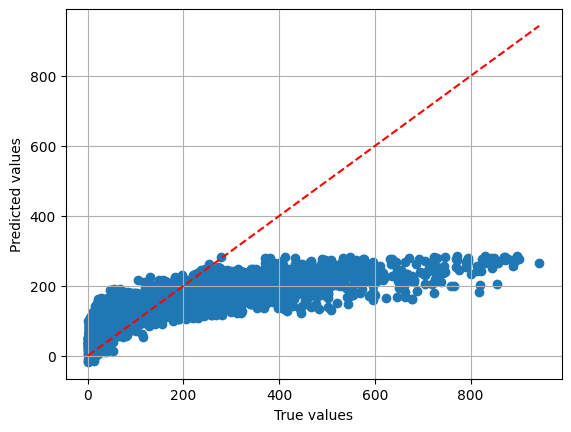

In [123]:
plt.scatter(y_test, svr_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # plots a 45 degress, that is a perfect model line.
plt.xlabel('True values'); plt.ylabel('Predicted values')
plt.grid(True)

This is not good at all. the model is severely under predicting, and while fine-tunning might improve the model, it is unlikely to give us what we want.But lets still try and see:

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
from sklearn.pipeline import make_pipeline

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
model_path = 'models/vr_grid_search_results.joblib'

param_grid = {
    'svr__C':[1,10],
    'svr__gamma':['scale',0.1,1],
    'svr__epsilon':[0.1,0.2],
    'svr__kernel':['rbf']
}


In [128]:
svr_reg = SVR()

In [129]:
pipeline = make_pipeline(scaler, svr_reg)

In [130]:
grid_search = GridSearchCV(pipeline,param_grid,cv=5,scoring='neg_mean_squared_error',
                          verbose=2, n_jobs=1)

In [131]:
import os
import joblib as jb

In [132]:
#load if exist, otherwise train the model and save
if os.path.exists(model_path):
    print('✔ loading grid_search saved model...')
    grid_search = jb.load(model_path)
else:
    print('🛠⚙ training model with grid_serchCV...')
    grid_search = GridSearchCV(pipeline,param_grid,cv=5,scoring='neg_mean_squared_error',
                          verbose=2, n_jobs=1)
    grid_search.fit(X_train,y_train)

    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    jb.dump(grid_search, model_path)
    print(" 📦 The model has been saved to the model path: ", model_path)

print('Grid search best estimator: ', grid_search.best_params_)

✔ loading grid_search saved model...
Grid search best estimator:  {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}


In [133]:
# scaling 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [134]:
svr_reg = SVR(C=10,epsilon=0.1,gamma='scale',kernel='rbf')

In [135]:
svr_reg.fit(X_train,y_train)

SVR(C=10)

In [136]:
svr_pred = svr_reg.predict(X_test)

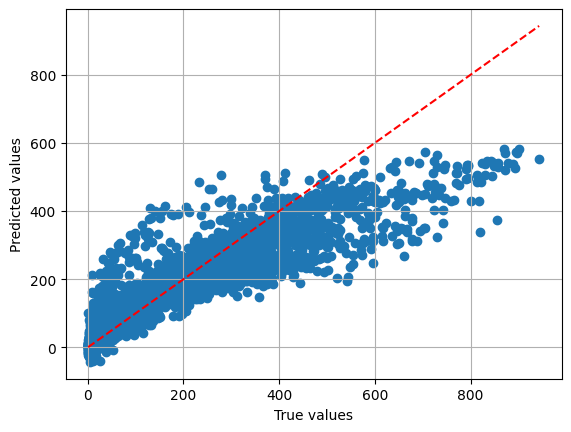

In [137]:
plt.scatter(y_test, svr_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # plots a 45 degress, that is a perfect model line.
plt.xlabel('True values'); plt.ylabel('Predicted values')
plt.grid(True)

Our model has clearly improved, though is still under-predicting as the true values increases. Since our model hasn't show any significant improvement compare to the linear regression model, we will go ahead and try another algorithm.

In [138]:
from sklearn.ensemble import RandomForestRegressor

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [140]:
forest_reg = RandomForestRegressor(random_state=42)

In [141]:
forest_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [142]:
forest_pred = forest_reg.predict(X_test)

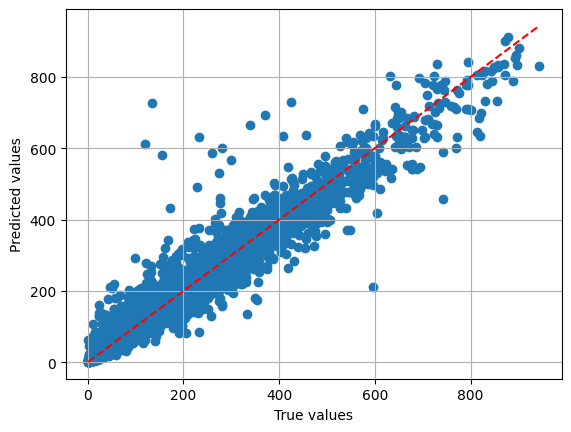

In [143]:
plt.scatter(y_test, forest_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # plots a 45 degress, that is a perfect model line.
plt.xlabel('True values'); plt.ylabel('Predicted values')
plt.grid(True)

Oh wow, this is by far, by visual inspection our best model so far. the prediction largely follows the ideal red-line diagonal, and inlike the previous models, its actually good at predicting even as the true values keeps increasing. Lets check the RMSLE ---->

In [144]:
msle = mean_squared_log_error(y_test, forest_pred)

In [145]:
rmsle = np.sqrt(msle)
rmsle

0.3699314448066256

This is far better than the previous error of 0.59 from the linear regression model. lets check for more relatable value

In [146]:
np.exp(0.369)

1.4462876036747396

This means our model is within a factor of 1.45 of the actual value, that is about 45% of the actual value on log scale.Now for even better accuracy, lets fine tune our model:

In [147]:
random_fr = RandomForestRegressor(random_state=42)

rf_model_path = 'rf_models/rf_grid_search_results.joblib'

param_grid_rf = {
    'n_estimators': [3,50,100,150,200,250,300],
    'max_features': [10,20,None],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1,2]
}

In [148]:
grid_search_rf = GridSearchCV(random_fr,param_grid=param_grid_rf,
                             cv=3,verbose=2,n_jobs=1,
                             scoring='neg_mean_squared_error')

In [149]:
#just as previous, load if exist, otherwise train the model and save
if os.path.exists(rf_model_path):
    print('✔✔ loading grid search for random forest model....')
    print('\n')
    grid_search_rf = jb.load(rf_model_path)

else:
    print('🛠⚙ training random forest model with grid_search...')
    print('\n')
    grid_search_rf = GridSearchCV(random_fr,param_grid=param_grid_rf,
                             cv=3,verbose=2,n_jobs=1,
                             scoring='neg_mean_squared_error')
    grid_search_rf.fit(X_train,y_train)

    os.makedirs(os.path.dirname(rf_model_path), exist_ok=True)
    jb.dump(grid_search_rf, rf_model_path)
    print('📦 model has been saved to the random forest regressor model path ...', rf_model_path)
    print('\n')

print('Grid search best estimator: ', grid_search_rf.best_params_)

✔✔ loading grid search for random forest model....


Grid search best estimator:  {'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}


In [150]:
forest_reg = RandomForestRegressor(random_state=42,max_features=None,min_samples_leaf=1,min_samples_split=2,
                                  n_estimators=250)

In [151]:
forest_reg.fit(X_train,y_train)

RandomForestRegressor(max_features=None, n_estimators=250, random_state=42)

In [152]:
forest_pred = forest_reg.predict(X_test)

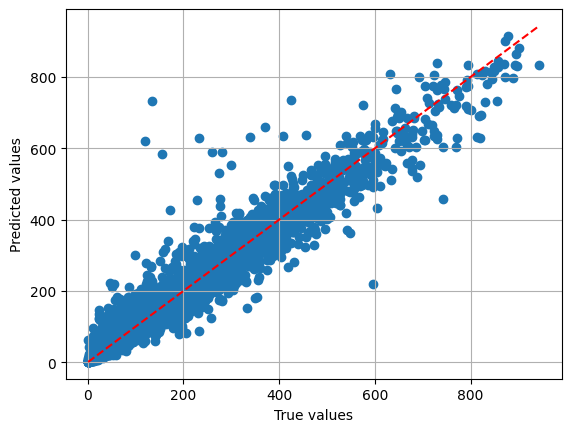

In [153]:
plt.scatter(y_test, forest_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # plots a 45 degress, that is a perfect model line.
plt.xlabel('True values'); plt.ylabel('Predicted values')
plt.grid(True)

There are no much clear difference  between this and the previous, to actually see the improvement, lets evaluate using RMSLE --->

In [154]:
msle = mean_squared_log_error(y_test, forest_pred)

In [155]:
rmsle = np.sqrt(msle)
rmsle

0.3671901753745585

There is slight improvemnt to our model, from 0.369 down to 0.367.

In [156]:
forest_pred

array([ 46.028,  20.94 , 193.916, ...,  97.564, 408.688, 158.688])